# Calculate Semantic Similarities

In [8]:
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
embedding_model = SentenceTransformer('../models/all-MiniLM-L12-v2', device='cpu')

In [5]:
issues = [
    "Accidental Deaths",
    "Social Deficiencies",
    "Natural Disasters"
]

topic_keywords_al = [
    "northern agreement british friday good new minister unity future election",  # Topic 0
    "garda man video dublin drew abuse sexual inquiry mcgreevy threat", # Topic 1
    "library street rising moore 1916 national trails saturday rural easter"    # Topic 2
]

topic_keywords_ms = [
    "minister rté committee martin mcdonald time ní people told raghallaigh]",  # Topic 0
    "people accommodation asylum state countries protection international seekers mcentee eu", # Topic 1
    "abuse schools religious orders inquiry report survivors scoping sexual redress"    # Topic 2
]


issue_embeddings = embedding_model.encode(issues)
al_embeddings = embedding_model.encode(topic_keywords_al)
ms_embeddings = embedding_model.encode(topic_keywords_ms)

In [6]:

al_cosine_matrix = util.cos_sim(al_embeddings, issue_embeddings)
ms_cosine_matrix = util.cos_sim(ms_embeddings, issue_embeddings)

print('\nal')
print(al_cosine_matrix)

print('\nms')
print(ms_cosine_matrix)


al
tensor([[-0.0836,  0.0294,  0.1165],
        [ 0.1477,  0.0883,  0.1311],
        [ 0.0750,  0.0817,  0.2580]])

ms
tensor([[0.0732, 0.1003, 0.1269],
        [0.0439, 0.1427, 0.1327],
        [0.1208, 0.0864, 0.1365]])


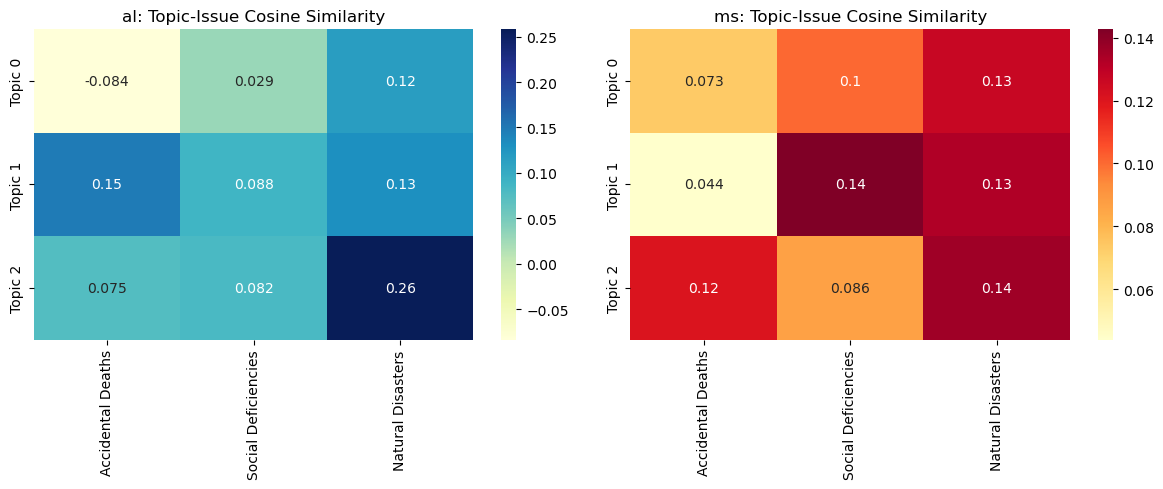

In [9]:
#Visualization
al_cos = al_cosine_matrix.cpu().numpy() if hasattr(al_cosine_matrix, 'cpu') else np.array(al_cosine_matrix)
ms_cos = ms_cosine_matrix.cpu().numpy() if hasattr(ms_cosine_matrix, 'cpu') else np.array(ms_cosine_matrix)

issues = ["Accidental Deaths", "Social Deficiencies", "Natural Disasters"]
topics = ["Topic 0", "Topic 1", "Topic 2"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(al_cos, annot=True, cmap="YlGnBu", xticklabels=issues, yticklabels=topics)
plt.title("al: Topic-Issue Cosine Similarity")

plt.subplot(1, 2, 2)
sns.heatmap(ms_cos, annot=True, cmap="YlOrRd", xticklabels=issues, yticklabels=topics)
plt.title("ms: Topic-Issue Cosine Similarity")

plt.tight_layout()
plt.show()